In [2]:
# Importing required Libraries
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve, auc
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('creditcard.csv') # reading the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.info() # Fortunately there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

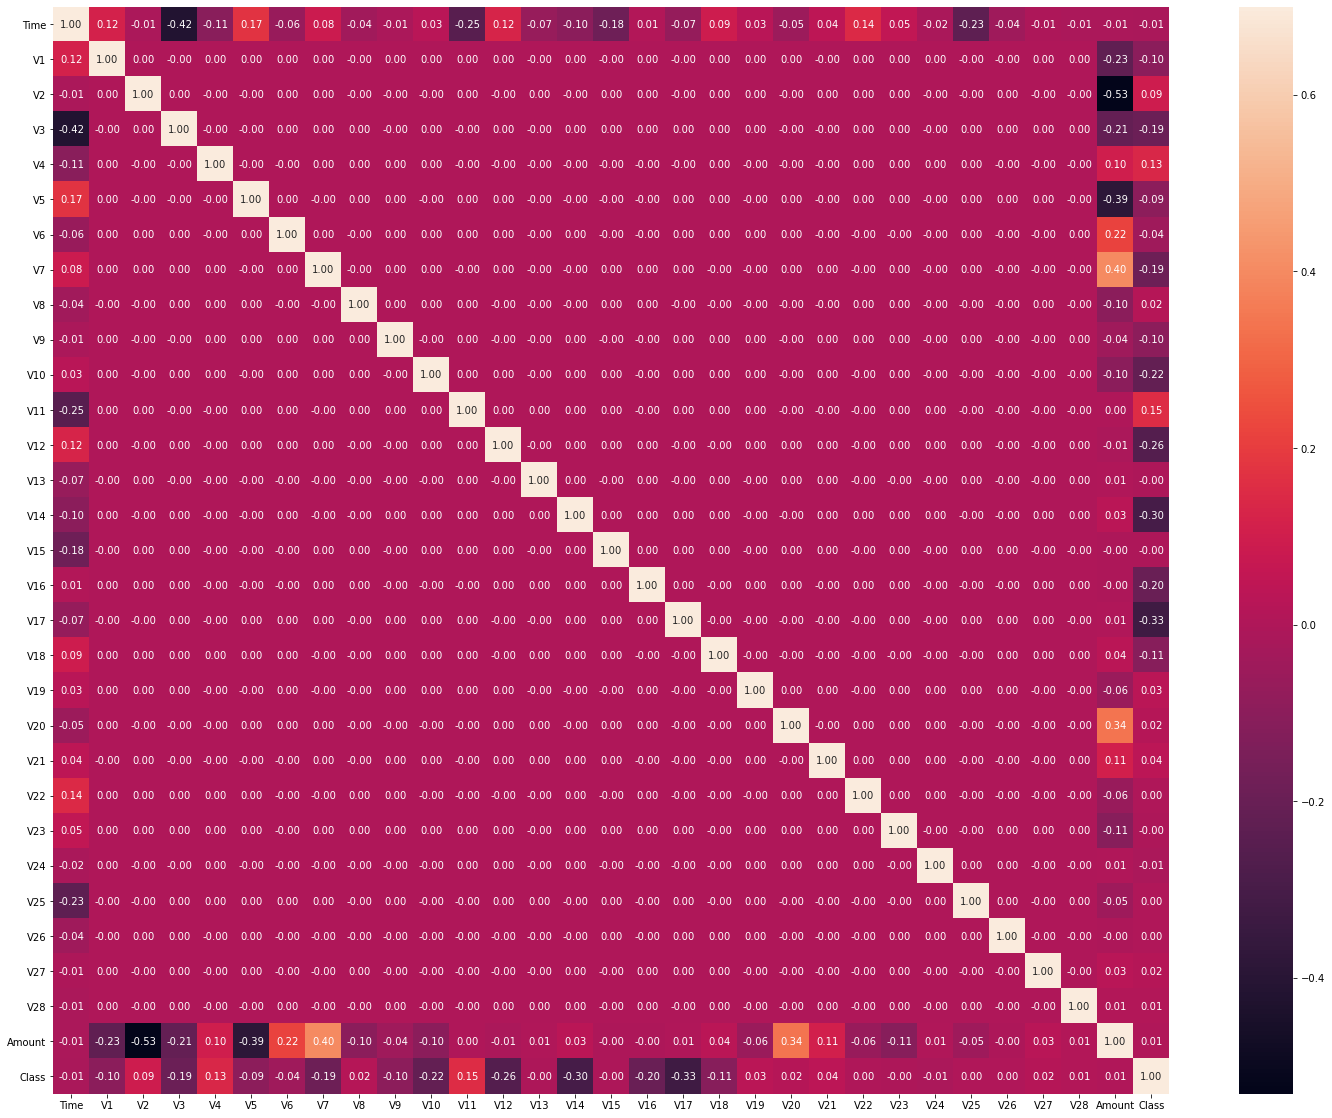

In [9]:
# Correlation plot
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),vmax=.7,cbar=True,fmt=".2f",annot=True)
plt.savefig('correlation actual.png', bbox_inches="tight")

In [4]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


**Note:**  Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

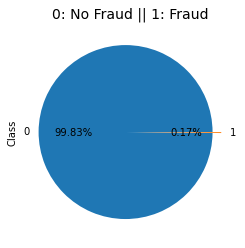

In [7]:
#sns.countplot('Class', data=data)
#plt.title('0: No Fraud || 1: Fraud', fontsize=14)
#data["Class"].value_counts().plot.pie(autopct='%1.2f%%',explode=[0.05]*2,textprops={"fontsize": 10})
#plt.savefig('Class Distribution.png')

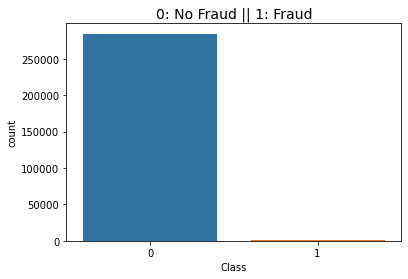

In [7]:
sns.countplot('Class', data=data)
plt.title('0: No Fraud || 1: Fraud', fontsize=14)
plt.savefig('Class Distribution.png', bbox_inches="tight")

KeyError: 'Amount'

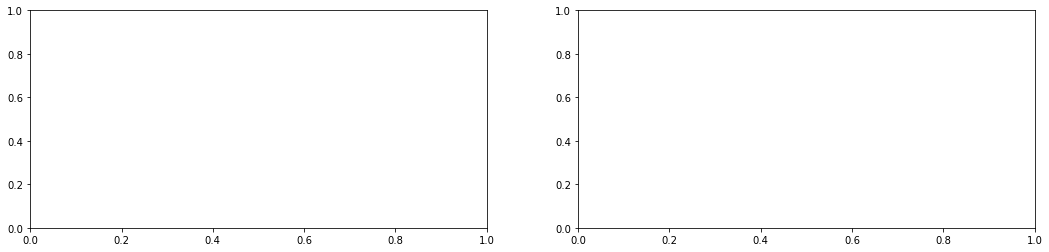

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.savefig('Distributions.png', bbox_inches="tight")

In [11]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

#### Feature Importance

In [12]:
# Dividing target and independant variables
X = data.drop(['Class'],axis=1)
y = data['Class']

In [11]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

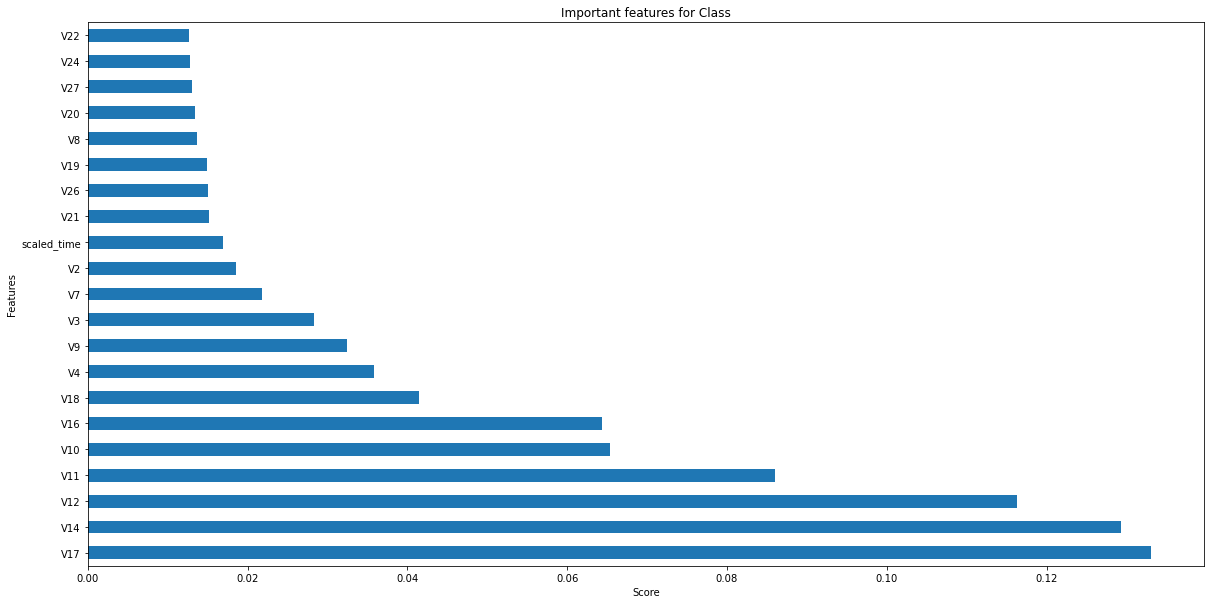

In [12]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(20,10))
plot = feat_importances.nlargest(21).plot(kind='barh')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Important features for Class')
plt.show()

In [13]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Model Building

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

KNN

In [7]:
# As you can see at neighbours 10, the score is high
classifier1 = KNeighborsClassifier(n_neighbors = 1)
# predicting output
classifier1.fit(X_train,y_train)
y_pred = classifier1.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

[[85277    30]
 [  108    28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.48      0.21      0.29       136

    accuracy                           1.00     85443
   macro avg       0.74      0.60      0.64     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9983848881710614
F1 score: 0.998
precision score: 0.998
recall score: 0.998
ROC Area under Curve: 0.603


SVM

In [16]:
classifier3 = SVC()
classifier3.fit(X_train,y_train)
y_pred = classifier3.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

[[85300     7]
 [   40    96]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.71      0.80       136

    accuracy                           1.00     85443
   macro avg       0.97      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9994499256814484
F1 score: 0.999
precision score: 0.999
recall score: 0.999
ROC Area under Curve: 0.853


XG boost

In [17]:
classifier2 = xgboost.XGBClassifier()
classifier2.fit(X_train,y_train)
y_pred = classifier2.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

[15:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[85301     6]
 [   21   115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.85      0.89       136

    accuracy                           1.00     85443
   macro avg       0.98      0.92      0.95     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9996839998595555
F1 score: 1.0
precision score: 1.0
recall score: 1.0
ROC Area under Curve: 0.923


In [18]:
classifier4 =LogisticRegression()
classifier4.fit(X_train,y_train)
y_pred = classifier4.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

[[85295    12]
 [   50    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9992743700478681
F1 score: 0.999
precision score: 0.999
recall score: 0.999
ROC Area under Curve: 0.816


Under Sampling

In [14]:
from imblearn.under_sampling import NearMiss

In [15]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_und,y_und=nm.fit_sample(X_train, y_train)

In [16]:
X_und.shape,y_und.shape

((712, 30), (712,))

In [11]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_und)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 356, 1: 356})


In [17]:
X_train1 = X_und
y_train1 = y_und

In [18]:
data1 = pd.concat([X_train1, y_train1], axis=1)

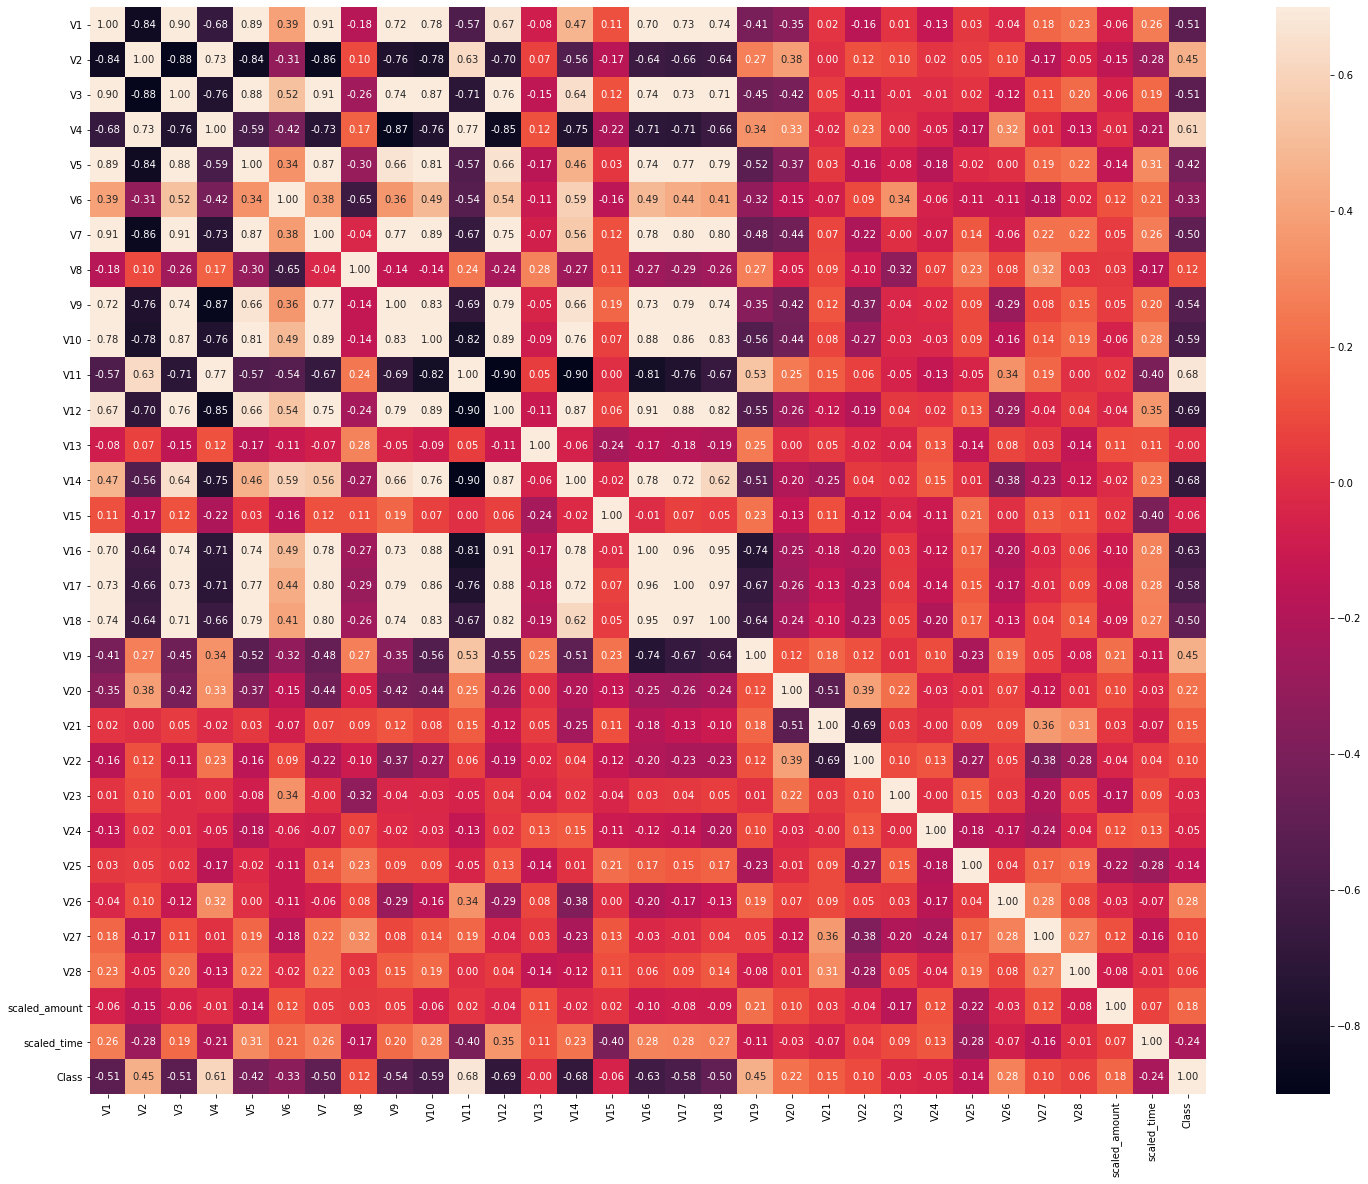

In [19]:
# Correlation plot
plt.figure(figsize=(25,20))
sns.heatmap(data1.corr(),vmax=.7,cbar=True,fmt=".2f",annot=True)
plt.savefig('correlation Under sample.png', bbox_inches="tight")

In [25]:
# As you can see at neighbours 10, the score is high
classifier1 = KNeighborsClassifier(n_neighbors = 1)
# predicting output
classifier1.fit(X_train1,y_train1)
y_pred = classifier1.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

[[38972 46335]
 [    4   132]]
              precision    recall  f1-score   support

           0       1.00      0.46      0.63     85307
           1       0.00      0.97      0.01       136

    accuracy                           0.46     85443
   macro avg       0.50      0.71      0.32     85443
weighted avg       1.00      0.46      0.63     85443

Accuracy: 0.4576618330348888
F1 score: 0.626
precision score: 0.998
recall score: 0.458
ROC Area under Curve: 0.714


In [26]:
classifier3 = SVC()
classifier3.fit(X_train1,y_train1)
y_pred = classifier3.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

[[76621  8686]
 [   13   123]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85307
           1       0.01      0.90      0.03       136

    accuracy                           0.90     85443
   macro avg       0.51      0.90      0.49     85443
weighted avg       1.00      0.90      0.94     85443

Accuracy: 0.898189436232342
F1 score: 0.945
precision score: 0.998
recall score: 0.898
ROC Area under Curve: 0.901


In [27]:
classifier2 = xgboost.XGBClassifier()
classifier2.fit(X_train1,y_train1)
y_pred = classifier2.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

[15:05:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[17594 67713]
 [    5   131]]
              precision    recall  f1-score   support

           0       1.00      0.21      0.34     85307
           1       0.00      0.96      0.00       136

    accuracy                           0.21     85443
   macro avg       0.50      0.58      0.17     85443
weighted avg       1.00      0.21      0.34     85443

Accuracy: 0.2074482403473661
F1 score: 0.341
precision score: 0.998
recall score: 0.207
ROC Area under Curve: 0.585


In [28]:
classifier4 =LogisticRegression()
classifier4.fit(X_train1,y_train1)
y_pred = classifier4.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

[[52316 32991]
 [    8   128]]
              precision    recall  f1-score   support

           0       1.00      0.61      0.76     85307
           1       0.00      0.94      0.01       136

    accuracy                           0.61     85443
   macro avg       0.50      0.78      0.38     85443
weighted avg       1.00      0.61      0.76     85443

Accuracy: 0.6137893098322859
F1 score: 0.759
precision score: 0.998
recall score: 0.614
ROC Area under Curve: 0.777


Over sampling

In [20]:
# Importing SMOTETomek
from imblearn.over_sampling import RandomOverSampler
# Implementing Oversampling for Handling Imbalanced 
os =  RandomOverSampler(random_state=42)
X_res, y_res = os.fit_sample(X_train, y_train)

In [21]:
print('old shape',X.shape,y.shape)
print('New shape SMOTETomek',X_res.shape,y_res.shape)

old shape (284807, 30) (284807,)
New shape SMOTETomek (398016, 30) (398016,)


In [22]:
X_train2 = X_res
y_train2 = y_res

In [23]:
data2 = pd.concat([X_train2, y_train2], axis=1)

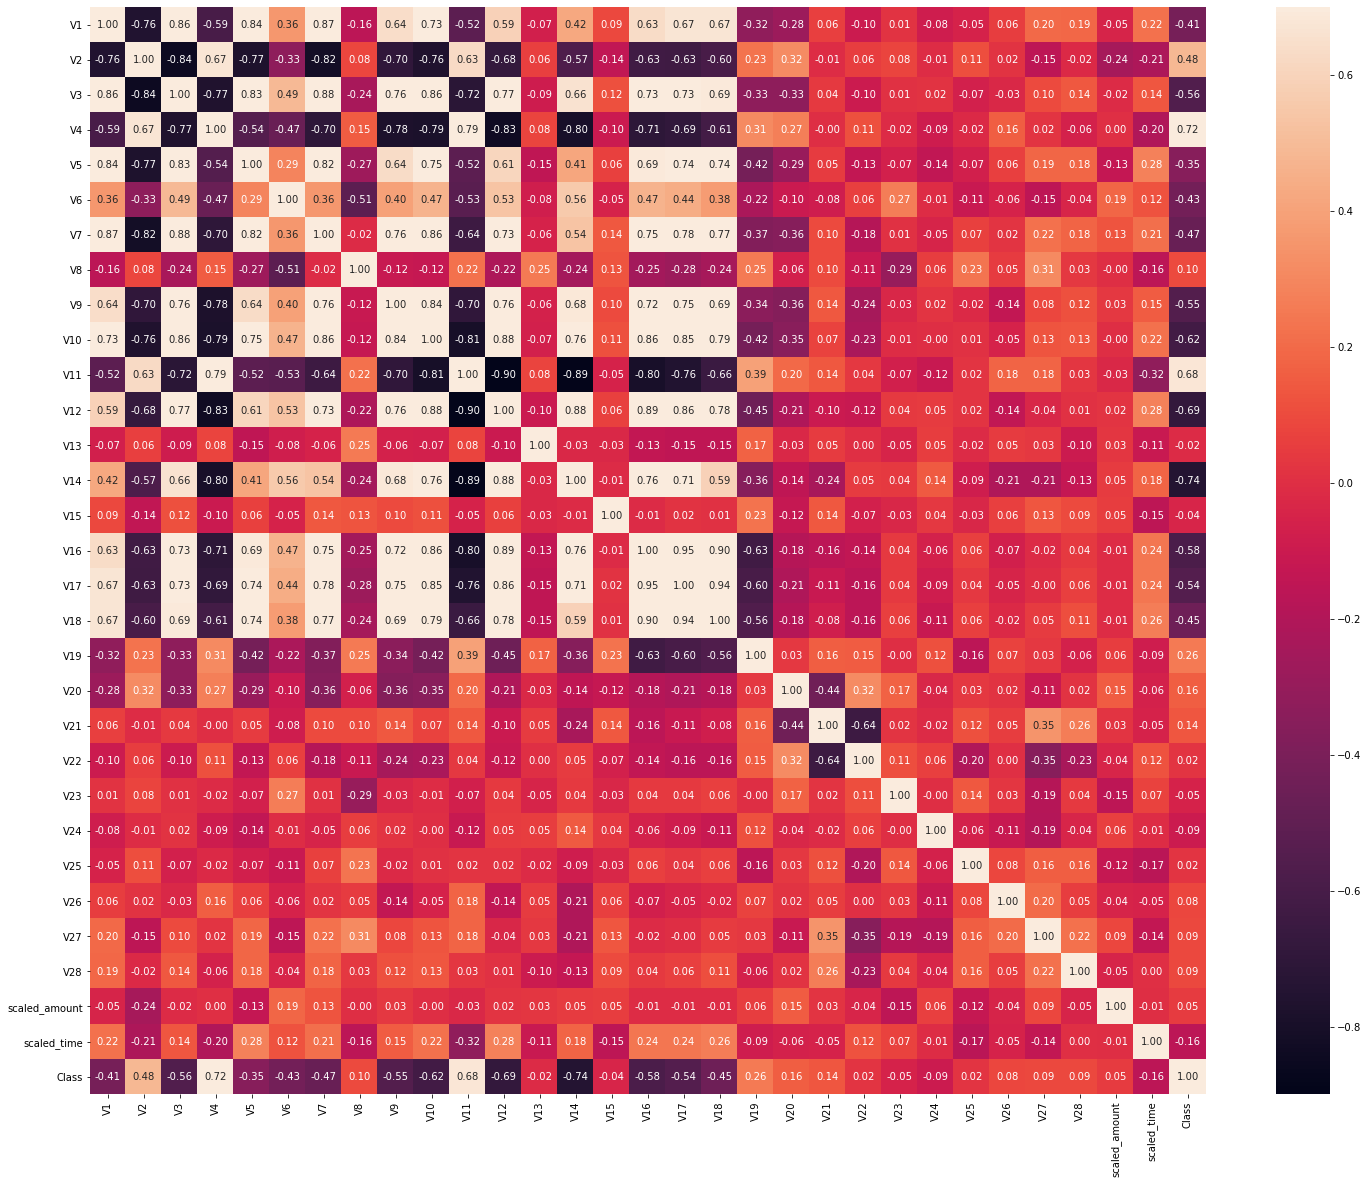

In [24]:
# Correlation plot
plt.figure(figsize=(25,20))
sns.heatmap(data2.corr(),vmax=.7,cbar=True,fmt=".2f",annot=True)
plt.savefig('correlation Over sample.png', bbox_inches="tight")

In [33]:
# As you can see at neighbours 10, the score is high
classifier1 = KNeighborsClassifier(n_neighbors = 1)
# predicting output
classifier1.fit(X_train2,y_train2)
y_pred = classifier1.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

[[85291    16]
 [   24   112]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.82      0.85       136

    accuracy                           1.00     85443
   macro avg       0.94      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9995318516437859
F1 score: 1.0
precision score: 1.0
recall score: 1.0
ROC Area under Curve: 0.912


In [34]:
classifier2 = xgboost.XGBClassifier()
classifier2.fit(X_train2,y_train2)
y_pred = classifier2.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

[15:08:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[85295    12]
 [   20   116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.91      0.85      0.88       136

    accuracy                           1.00     85443
   macro avg       0.95      0.93      0.94     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9996254813150287
F1 score: 1.0
precision score: 1.0
recall score: 1.0
ROC Area under Curve: 0.926


In [ ]:
classifier3 = SVC()
classifier3.fit(X_train2,y_train2)
y_pred = classifier3.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

In [21]:
classifier4 =LogisticRegression()
classifier4.fit(X_train2,y_train2)
y_pred = classifier4.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

[[82733  2574]
 [    9   127]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85307
           1       0.05      0.93      0.09       136

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Accuracy: 0.9697693198974755
F1 score: 0.983
precision score: 0.998
recall score: 0.97
ROC Area under Curve: 0.952


In [ ]:
data.drop(['V1','V2','V3','V4','V5','V9','V10','V11','V12','V14','V16','V17','V18'], axis=1, inplace=True)

In [ ]:
Logistic Regression = [61.37,75.9,40.7,32.6]
KNN =[54,51.4,56.7,54.4]

In [8]:
import pandas as pd

data1 = {'Model':['Logistic Regression','KNN','SVM','XG-boost','Logistic Regression','KNN','SVM','XG-boost','Logistic Regression',
                 'KNN','SVM','XG-boost','Logistic Regression','KNN','SVM','XG-boost','Logistic Regression','KNN','SVM','XG-boost'],
        'Cases':['Actual Data','Actual Data','Actual Data','Actual Data','Under-sampled','Under-sampled','Under-sampled',
                'Under-sampled','Under-sampled (Correlated Features dropped)','Under-sampled (Correlated Features dropped)',
                'Under-sampled (Correlated Features dropped)','Under-sampled (Correlated Features dropped)',
                'Over-sampled','Over-sampled','Over-sampled','Over-sampled',
                'Over-sampled (Correlated Features dropped)','Over-sampled (Correlated Features dropped)',
               'Over-sampled (Correlated Features dropped)','Over-sampled (Correlated Features dropped)'],
        'Precision':  [55,51.4,58.32,54.32,62,32.3,58.3,33.2,63,40.3,60.3,34.2,68,88.2,67,99,69.8,88.7,68.6,99],
        'Recall': [40.7,56.4,54.83,58.45,86,72.81,83.5,80.32,88,73.81,84.5,82.32,70,84,75,94.3,71.7,87.8,70.6,94.3]
        }

df = pd.DataFrame (data1, columns = ['Model','Cases','Precision','Recall'])

print (df)

                  Model                                        Cases  \
0   Logistic Regression                                  Actual Data   
1                   KNN                                  Actual Data   
2                   SVM                                  Actual Data   
3              XG-boost                                  Actual Data   
4   Logistic Regression                                Under-sampled   
5                   KNN                                Under-sampled   
6                   SVM                                Under-sampled   
7              XG-boost                                Under-sampled   
8   Logistic Regression  Under-sampled (Correlated Features dropped)   
9                   KNN  Under-sampled (Correlated Features dropped)   
10                  SVM  Under-sampled (Correlated Features dropped)   
11             XG-boost  Under-sampled (Correlated Features dropped)   
12  Logistic Regression                                 Over-sam

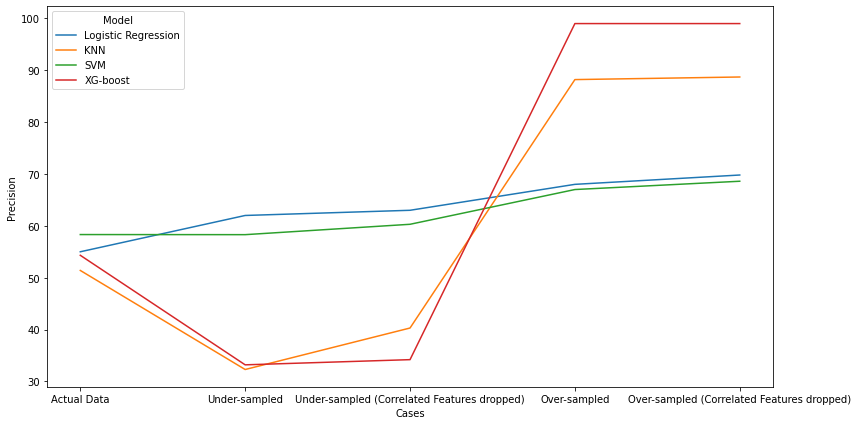

In [9]:
plt.figure(figsize=(13,7))
sns.lineplot(x = 'Cases', y = 'Precision', hue = 'Model', data=df)
plt.savefig('Precision.png', bbox_inches="tight")

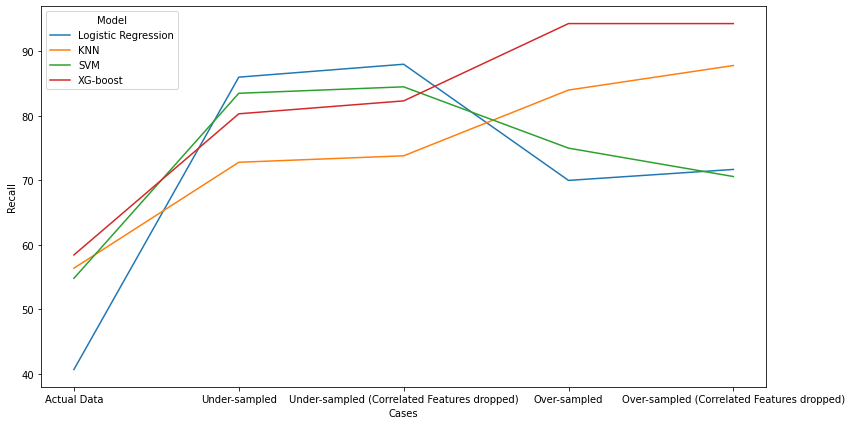

In [10]:
plt.figure(figsize=(13,7))
sns.lineplot(x = 'Cases', y = 'Recall', hue = 'Model', data=df)
plt.savefig('Recall.png', bbox_inches="tight")